In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import resample
from sklearn import metrics

# Dataset lowvariance + correlation filter

In [2]:
lc_dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/04. Feature Selection/lowvariance_correlationfilter_dataset.csv")
lc_clean_dataset = lc_dataset.drop(columns=["Label"])
lc_label = lc_dataset["Label"]
lc_dataset

,Flow Duration,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,Bwd Init Win Bytes,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.278110,0.277967,0.011145,0.0,0.003708,0.727273,0.273822,0.807669,0.330272,2.022253e-09,Malware
1,0.001026,0.001027,0.000094,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
2,0.070998,0.070903,0.010628,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
3,0.008326,0.008232,0.008102,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
4,0.034303,0.034210,0.008331,0.0,0.003708,0.727273,0.988083,0.000000,0.330273,9.889994e-01,Malware
...,...,...,...,...,...,...,...,...,...,...,...
17909,0.000009,0.000000,0.000000,0.0,0.020890,0.727273,0.982628,0.000000,0.023788,9.839642e-01,Benign
17910,0.000028,0.000000,0.000000,0.0,0.020890,0.727273,0.982623,0.000000,0.023494,9.839594e-01,Benign
17911,0.000095,0.000000,0.000000,0.0,0.000000,0.181818,0.982627,0.000000,0.023742,9.839634e-01,Benign
17912,0.000014,0.000000,0.000000,0.0,0.021149,0.727273,0.982624,0.000000,0.023557,9.839604e-01,Benign


# Dataset PCA

In [3]:
pca_dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/04. Feature Selection/pca_dataset.csv")
pca_clean_dataset = pca_dataset.drop(columns=["Label"])
pca_label = pca_dataset["Label"]
pca_dataset

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Label
0,0.147808,-0.514771,0.286697,-0.137553,0.913494,0.855905,0.273484,-0.479864,0.440577,Malware
1,-1.022914,-0.885687,0.002199,-0.213661,0.404288,-0.050455,-0.015976,-0.223345,0.395839,Malware
2,-0.906647,-1.049279,-0.090859,-0.119511,0.527799,0.251826,0.079525,-0.229274,0.820235,Malware
3,-0.961825,-1.072027,-0.092086,-0.123172,0.547419,0.261675,0.097636,-0.246404,0.766521,Malware
4,-0.932441,-1.071461,-0.095981,-0.121096,0.543819,0.264623,0.091478,-0.242332,0.799116,Malware
...,...,...,...,...,...,...,...,...,...,...
17909,-1.272618,-0.516196,0.256069,-0.001591,0.236656,-0.174635,-0.357812,-0.020789,-0.113106,Benign
17910,-1.272900,-0.516462,0.256063,-0.000838,0.237219,-0.173486,-0.357441,-0.020440,-0.111875,Benign
17911,-1.213357,-0.449642,0.418320,-0.699023,-0.120048,-0.258811,-0.109428,-0.053669,0.016398,Benign
17912,-1.272611,-0.516280,0.256100,-0.001601,0.236615,-0.174460,-0.357927,-0.020759,-0.113045,Benign


## Decission Tree [lowvariance + correlation filter]

In [4]:
## Bagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    lc_clean_dataset, lc_label, test_size=0.25, random_state=27
)

In [5]:
X = pd.concat([x_train, y_train], axis=1)
X

,Flow Duration,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,Bwd Init Win Bytes,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2163,0.297466,0.033487,0.271163,0.0,0.002762,0.727273,0.452410,0.989230,0.332809,1.707248e-08,Malware
9538,0.978243,0.978243,0.977612,1.0,0.992935,0.454545,0.006954,0.408267,0.991100,1.083339e-09,Benign
12607,0.976446,0.976446,0.975166,1.0,0.992935,0.454545,0.015172,0.426475,0.998711,3.128308e-09,Benign
12563,0.965371,0.965371,0.964541,1.0,0.992935,0.454545,0.000021,0.392299,0.998598,7.301157e-10,Benign
16027,0.000035,0.000000,0.000000,0.0,0.000000,0.181818,0.984697,0.000000,0.140003,9.858735e-01,Benign
...,...,...,...,...,...,...,...,...,...,...,...
15897,0.002245,0.000000,0.000000,0.0,0.000000,0.181818,0.984681,0.000000,0.139110,9.858588e-01,Benign
4848,0.059978,0.059978,0.000000,0.0,0.000000,0.909091,0.988137,0.000000,0.333284,9.890488e-01,Malware
14879,0.992668,0.992668,0.000000,0.0,0.000000,0.000000,0.130291,0.623636,0.139651,1.530110e-08,Benign
3912,0.060245,0.060245,0.000000,0.0,0.000000,0.909091,0.988121,0.000000,0.332436,9.890349e-01,Malware


In [6]:
mal = X[X.Label == "Malware"]
ben = X[X.Label == "Benign"]

In [7]:
ben_upsampled = resample(ben, replace=True, n_samples=len(mal), random_state=27)
ben_upsampled

,Flow Duration,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,Bwd Init Win Bytes,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
6355,0.750429,0.750429,0.000000,0.0,0.000000,0.000000,0.273836,0.807700,0.332602,3.897725e-09,Benign
16792,0.498977,0.498977,0.000000,0.0,0.000000,0.181818,0.068968,0.526050,0.023626,2.028894e-09,Benign
15322,0.750666,0.750666,0.000000,0.0,0.000000,0.000000,0.183694,0.697255,0.140337,1.594773e-08,Benign
9292,0.971336,0.971336,0.000000,0.0,0.000000,0.000000,0.187477,0.707132,0.990472,2.017945e-08,Benign
8750,0.991251,0.991251,0.989809,1.0,0.992935,0.454545,0.015154,0.426396,0.987495,3.127643e-09,Benign
...,...,...,...,...,...,...,...,...,...,...,...
15333,0.750995,0.750995,0.000000,0.0,0.000000,0.000000,0.183694,0.697255,0.140351,1.597299e-08,Benign
8875,0.951653,0.951653,0.000000,0.0,0.000000,0.000000,0.133310,0.632451,0.987814,1.309208e-08,Benign
16616,0.072306,0.055559,0.071351,0.0,0.008606,0.454545,0.449658,0.984147,0.023529,5.983271e-10,Benign
15146,0.750145,0.750002,0.750067,0.0,0.003937,0.454545,0.183693,0.697251,0.140066,1.591240e-08,Benign


In [8]:
upsampled = pd.concat([mal, ben_upsampled])
y_train = upsampled.Label
x_train = upsampled.drop("Label", axis=1)
upsampled

,Flow Duration,Fwd IAT Total,Bwd IAT Total,Fwd PSH Flags,Bwd Init Win Bytes,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2163,0.297466,0.033487,0.271163,0.0,0.002762,0.727273,0.452410,0.989230,0.332809,1.707248e-08,Malware
6638,0.012503,0.012324,0.012311,0.0,0.003708,0.727273,0.989294,0.000000,0.398324,9.901174e-01,Malware
2669,0.267640,0.011077,0.267515,0.0,0.002762,0.727273,0.452417,0.989242,0.333586,1.650293e-08,Malware
1525,0.792441,0.792202,0.792196,1.0,0.002762,0.727273,0.452398,0.989207,0.331453,5.760816e-08,Malware
4824,0.059781,0.059781,0.000000,0.0,0.000000,0.909091,0.988087,0.000000,0.330510,9.890033e-01,Malware
...,...,...,...,...,...,...,...,...,...,...,...
15333,0.750995,0.750995,0.000000,0.0,0.000000,0.000000,0.183694,0.697255,0.140351,1.597299e-08,Benign
8875,0.951653,0.951653,0.000000,0.0,0.000000,0.000000,0.133310,0.632451,0.987814,1.309208e-08,Benign
16616,0.072306,0.055559,0.071351,0.0,0.008606,0.454545,0.449658,0.984147,0.023529,5.983271e-10,Benign
15146,0.750145,0.750002,0.750067,0.0,0.003937,0.454545,0.183693,0.697251,0.140066,1.591240e-08,Benign


In [9]:
# Cross Validation
dt_classifier = DecisionTreeClassifier(criterion="entropy")
dt_classifier.fit(x_train, y_train)
scores = cross_val_score(estimator=dt_classifier, X=lc_clean_dataset, y=lc_label, cv=10, n_jobs=4)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(), scores.std()), end="\n\n" )

mean: 0.989 (std: 0.033)



In [10]:
# Accuracy
y_pred = dt_classifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9991069435141773


In [11]:
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
recall

array([0.9986376, 1.       ])

In [12]:
# F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average=None)
f1

array([0.99931834, 0.9987055 ])

In [13]:
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None) * 100
precision

array([100.        ,  99.74143504])

In [14]:
conf = metrics.confusion_matrix(y_test, y_pred)
conf

array([[2932,    4],
       [   0, 1543]])

In [15]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()
    # plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    # plt.close()

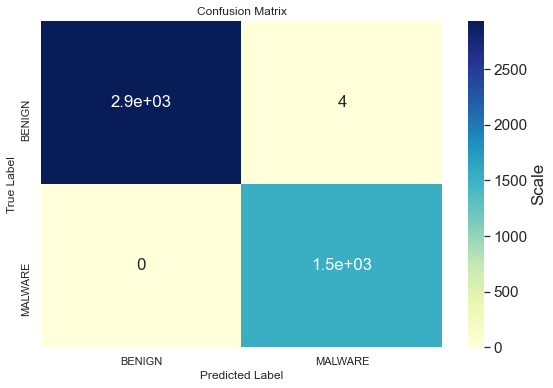

In [16]:
labels = ["BENIGN", "MALWARE"]
plot_confusion_matrix(conf, labels, "confusion_matrix.png")

## Decisstion Tree [pca]

In [20]:
## Bagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    pca_clean_dataset, pca_label, test_size=1/7.0, random_state=0
)

In [23]:
dt_classifier = DecisionTreeClassifier(criterion="entropy")
dt_classifier.fit(x_train, y_train)
scores = cross_val_score(estimator=dt_classifier, X=pca_clean_dataset, y=pca_label, cv=10, n_jobs=4)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(), scores.std()), end="\n\n" )

mean: 0.977 (std: 0.043)



In [22]:
y_pred = dt_classifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99609375
